## Downloading the Data and Creating the Test Set

In [1]:
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as zObject:
    zObject.extractall()

In [2]:
import numpy as np
import pandas as pd

In [3]:
demographic = pd.read_csv('Life Expectancy Data.csv')

### Take a quick look at the data

In [4]:
# There are null values in some columns. We need to fill the missing values.

demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

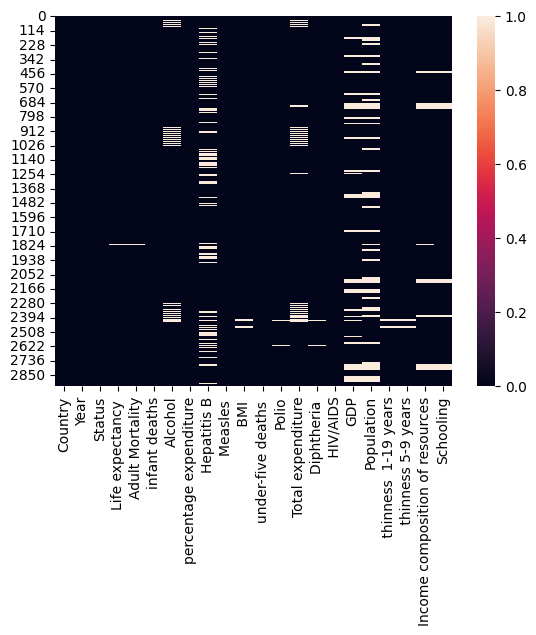

In [5]:
import seaborn as sns
sns.heatmap(pd.isnull(demographic))

In [6]:
# There are several rows for one country, so we'll use Binary Encoding on the Country column.
# The range of values for most columns are not in the same range, so we need to scale the data. We'll use the z-score standardization.
demographic.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# There are 193 countries.
demographic["Country"].nunique()

193

In [8]:
# There are some leading and trailing spaces in some column names.
demographic.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
demographic.rename(columns = lambda x:x.replace(' ', ''), inplace = True)
demographic.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [10]:
# Status column could be one-hot encoded because it has only two values.
demographic["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [11]:
# Take a glance at the data
demographic.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
# Check for missing values in the label column
demographic["Lifeexpectancy"].isnull().sum()

10

In [13]:
# Drop the rows containing null values in the label column as imputing them could introduce biases into the model
demographic = demographic.dropna(subset = ['Lifeexpectancy'])
demographic["Lifeexpectancy"].isnull().sum()

0

In [18]:
demographic

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [14]:
# There are 2928 rows but the last index is 2937 (not 2927).. We need to reset the index.
# Add the reset step
demographic.reset_index(inplace=True)

In [16]:
# Drop the old index column 
demographic.drop("index", axis=1, inplace=True)

In [17]:
demographic

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Create a Test Set

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratify shuffle split on the Status column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(demographic, demographic["Status"]):
    strat_train_set = demographic.loc[train_index]
    strat_test_set = demographic.loc[test_index]

In [20]:
strat_train_set["Status"].value_counts() / len(strat_train_set)

Status
Developing    0.824936
Developed     0.175064
Name: count, dtype: float64

In [21]:
demographic["Status"].value_counts()/len(demographic)

Status
Developing    0.825137
Developed     0.174863
Name: count, dtype: float64

## Data Exploration 

In [22]:
# create a copy of the data so that we don't modify the train set unintentionally
demo_copy = strat_train_set.copy()

In [23]:
demo_copy

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
967,Gambia,2008,Developing,58.7,287.0,3,2.79,0.000000,98.0,0,...,96.0,5.95,96.0,3.0,NaN,NaN,8.6,8.5,0.426,8.6
811,Egypt,2004,Developing,69.0,176.0,57,0.16,0.000000,97.0,80,...,97.0,5.21,97.0,0.1,NaN,NaN,3.3,3.2,0.623,11.2
762,Djibouti,2005,Developing,58.6,318.0,2,1.23,12.703259,NaN,298,...,71.0,7.21,71.0,3.9,94.729749,783254.0,5.9,5.8,0.396,4.0
2850,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.71,0.000000,82.0,0,...,82.0,4.94,82.0,0.1,NaN,NaN,1.6,1.5,0.770,14.2
396,Bulgaria,2003,Developed,72.0,155.0,1,11.19,32.386161,96.0,0,...,96.0,7.43,96.0,0.1,271.468240,7775327.0,2.3,2.4,0.729,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,Micronesia (Federated States of),2004,Developing,67.7,179.0,0,2.02,0.000000,8.0,0,...,82.0,1.64,78.0,0.1,NaN,NaN,0.2,0.2,0.616,10.5
2765,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,87.0,4,11.44,0.000000,NaN,314,...,91.0,7.57,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
1148,Honduras,2003,Developing,71.9,166.0,6,3.04,194.433574,91.0,0,...,92.0,8.29,92.0,1.4,1157.342700,733821.0,2.6,2.5,0.566,10.3
2260,Serbia,2011,Developing,74.6,127.0,1,9.56,915.319079,94.0,370,...,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5


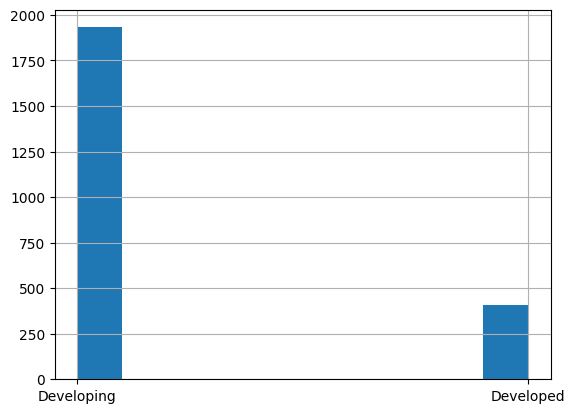

In [24]:
# Plot the histogram of developing and developed countries
import matplotlib.pyplot as plt
demo_copy["Status"].hist()
plt.show()

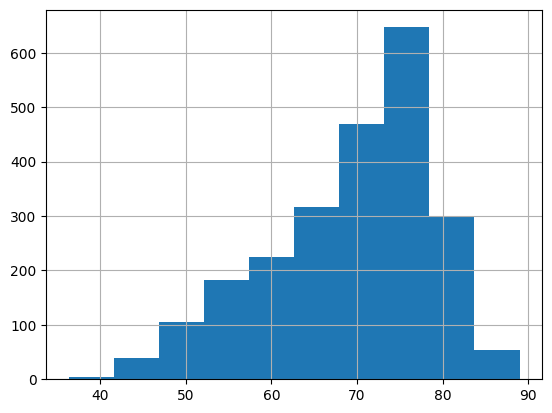

In [25]:
demo_copy["Lifeexpectancy"].hist()
plt.show()

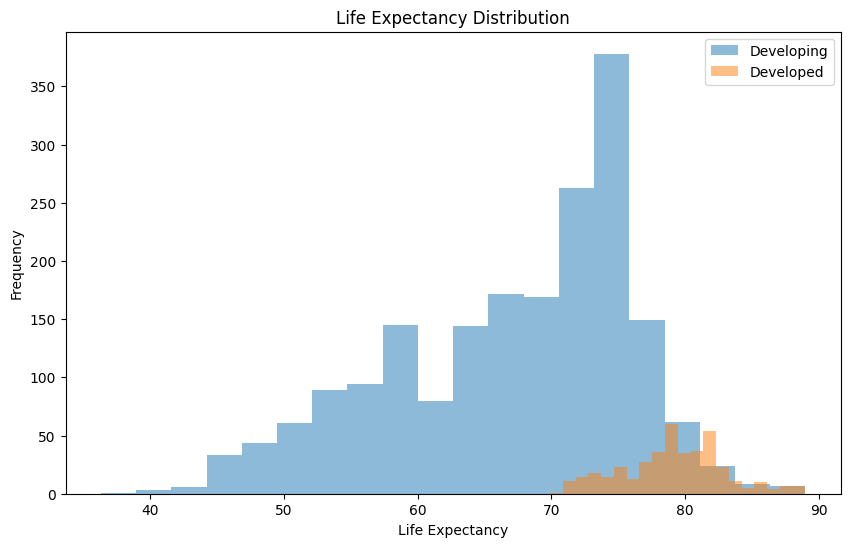

In [26]:
# Histograms with both developing and developed countries
# Filter data for developing and developed countries
developing = demo_copy[demo_copy["Status"] == "Developing"]["Lifeexpectancy"]
developed = demo_copy[demo_copy["Status"] == "Developed"]["Lifeexpectancy"]

# Plot histograms
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(developing, bins=20, alpha=0.5, label='Developing')
plt.hist(developed, bins=20, alpha=0.5, label='Developed')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Life Expectancy Distribution')
plt.legend()
plt.show()

In [27]:
demo_copy_sorted = demo_copy.sort_values(by=['Country', 'Year'])

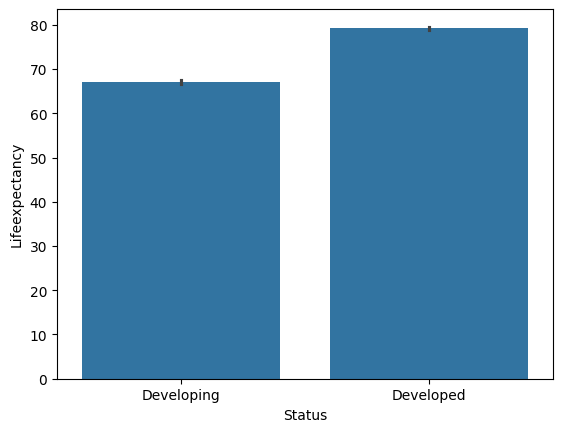

In [28]:
# The life expectancy of developed countries is higher than that of developing countries
sns.barplot(x = 'Status', y = 'Lifeexpectancy', data = demo_copy, estimator='mean')
plt.show()

### Correlation Matrix

In [29]:
corr_matrix = demo_copy.corr(numeric_only=True)

In [30]:
# Let's see how the feature variables are correlated with the label
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
infantdeaths                   -0.190076
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpectancy, dtype: float64

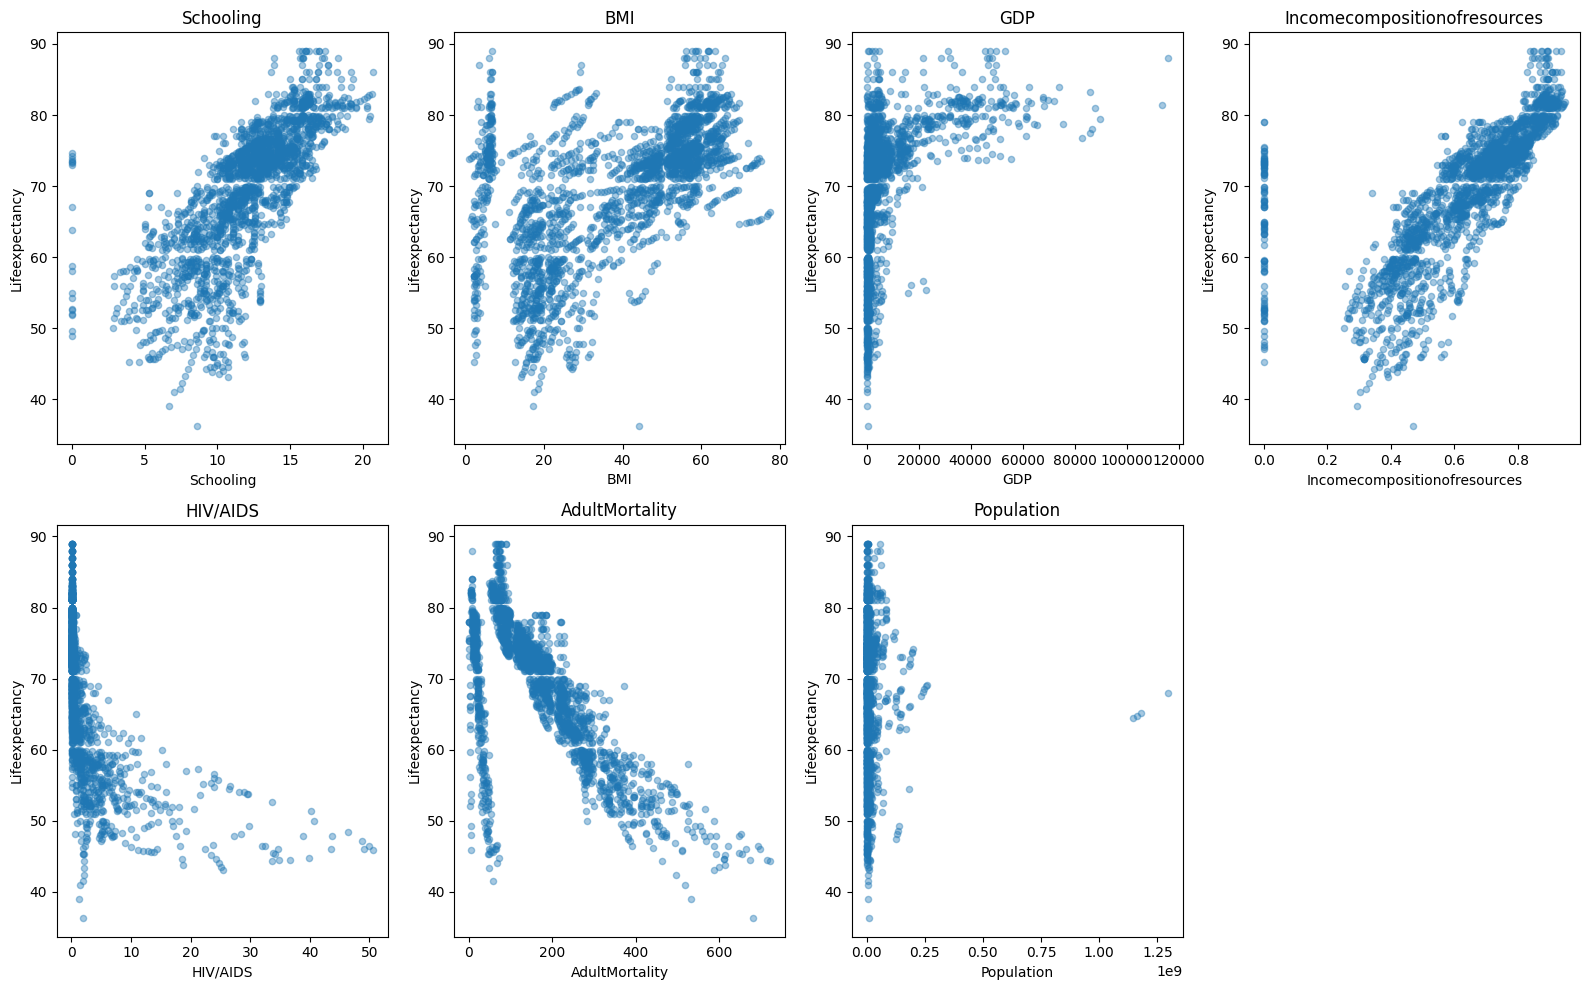

In [32]:
# Plotting histograms
# Observation :-
# High positive correlation with schooling, bmi, gdp, incomecompositon.. negative correlation with hiv/aids, adult mortality..
# negligble correlation with population
attribs_interest = ["Schooling", "BMI", "GDP", "Incomecompositionofresources", "HIV/AIDS", "AdultMortality", "Population"]

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()
for i, attr in enumerate(attribs_interest):
    ax = axes[i]  
    demo_copy.plot(kind='scatter', x=attr, y="Lifeexpectancy", alpha=0.4, ax=ax)
    ax.set_title(attr)  

for j in range(len(attribs_interest), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Experimenting with attributes combinations

In [33]:
pd.Series(demo_copy.columns)
# maybe we can think of combining some categories that are similar like HepatitisB, Polio, Diphtheria (immunization coverage),
# diseases (hiv/aids and measles), deaths (infant and under-five), etc

0                          Country
1                             Year
2                           Status
3                   Lifeexpectancy
4                   AdultMortality
5                     infantdeaths
6                          Alcohol
7            percentageexpenditure
8                       HepatitisB
9                          Measles
10                             BMI
11                under-fivedeaths
12                           Polio
13                Totalexpenditure
14                      Diphtheria
15                        HIV/AIDS
16                             GDP
17                      Population
18               thinness1-19years
19                thinness5-9years
20    Incomecompositionofresources
21                       Schooling
dtype: object

In [34]:
demo_copy[["under-fivedeaths", "infantdeaths"]]

,under-fivedeaths,infantdeaths
967,6,3
811,70,57
762,2,2
2850,10,9
396,1,1
...,...,...
1707,0,0
2765,4,4
1148,7,6
2260,1,1


In [35]:
demo_copy[["thinness1-19years", "thinness5-9years"]]

,thinness1-19years,thinness5-9years
967,8.6,8.5
811,3.3,3.2
762,5.9,5.8
2850,1.6,1.5
396,2.3,2.4
...,...,...
1707,0.2,0.2
2765,0.7,0.5
1148,2.6,2.5
2260,2.2,2.2


In [36]:
# Looking at the correlations, it looks like we can combine the thinness and deaths of children
# Possibly we can drop the Population column since it has very low correlation
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
infantdeaths                   -0.190076
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpectancy, dtype: float64

In [37]:
demo_copy["Immunization"] = demo_copy["Diphtheria"] + demo_copy["Polio"] + demo_copy["HepatitisB"]
demo_copy["Diseases"] = demo_copy["HIV/AIDS"] + demo_copy["Measles"]
demo_copy["Thinness"] = demo_copy["thinness5-9years"] + demo_copy["thinness1-19years"]
demo_copy["ChildDeaths"] = demo_copy["infantdeaths"] + demo_copy["under-fivedeaths"]

In [38]:
corr_matrix = demo_copy.corr(numeric_only=True)
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

# Observation
# Immunization and Diseases don't have much correlation, so they will not be added
# But the correlation of ChildDeaths and Thinness is closer to the individual correlation of their sub-categories..
# So, we'll add them to see how important they are as a combined entity

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
Immunization                    0.384372
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
Diseases                       -0.164152
infantdeaths                   -0.190076
ChildDeaths                    -0.204926
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
Thinness                       -0.487418
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpect

## Data Preparation/Processing for ML 

In [39]:
# separate the labels and predictors
demographic = strat_train_set.drop("Lifeexpectancy", axis=1)
demographic_labels = strat_train_set["Lifeexpectancy"].copy()

### Data Cleaning

In [40]:
# Drop the population column
demographic.drop("Population", axis =1, inplace=True)

In [41]:
# Check what attributes have null values
demographic.isnull().sum()

Country                           0
Year                              0
Status                            0
AdultMortality                    0
infantdeaths                      0
Alcohol                         152
percentageexpenditure             0
HepatitisB                      450
Measles                           0
BMI                              26
under-fivedeaths                  0
Polio                            16
Totalexpenditure                179
Diphtheria                       16
HIV/AIDS                          0
GDP                             359
thinness1-19years                26
thinness5-9years                 26
Incomecompositionofresources    128
Schooling                       128
dtype: int64

### Separating columns by data types

In [43]:
# Get the numeric columns
demographic_num = demographic.select_dtypes(
    include=['int64', 'float64']
)

In [44]:
# Get the non-numeric columns
demographic_cat = demographic.select_dtypes(['object'])

In [45]:
demographic_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2342 entries, 967 to 1387
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  2342 non-null   object
 1   Status   2342 non-null   object
dtypes: object(2)
memory usage: 54.9+ KB


### Custom Transformers, Feature Scaling, and Transformation Pipelines

In [46]:
demographic.columns

Index(['Country', 'Year', 'Status', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness1-19years', 'thinness5-9years',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [47]:
# lots of data are skewed, so we need to apply transforms on them.
demographic_num.skew().sort_values(ascending=False)

infantdeaths                    10.022582
under-fivedeaths                 9.758248
Measles                          9.565939
HIV/AIDS                         5.374487
percentageexpenditure            4.376628
GDP                              3.038762
thinness5-9years                 1.818839
thinness1-19years                1.746740
AdultMortality                   1.157941
Alcohol                          0.584732
Totalexpenditure                 0.512218
Year                             0.007094
BMI                             -0.255130
Schooling                       -0.590481
Incomecompositionofresources    -1.153221
HepatitisB                      -1.988677
Diphtheria                      -2.106197
Polio                           -2.116511
dtype: float64

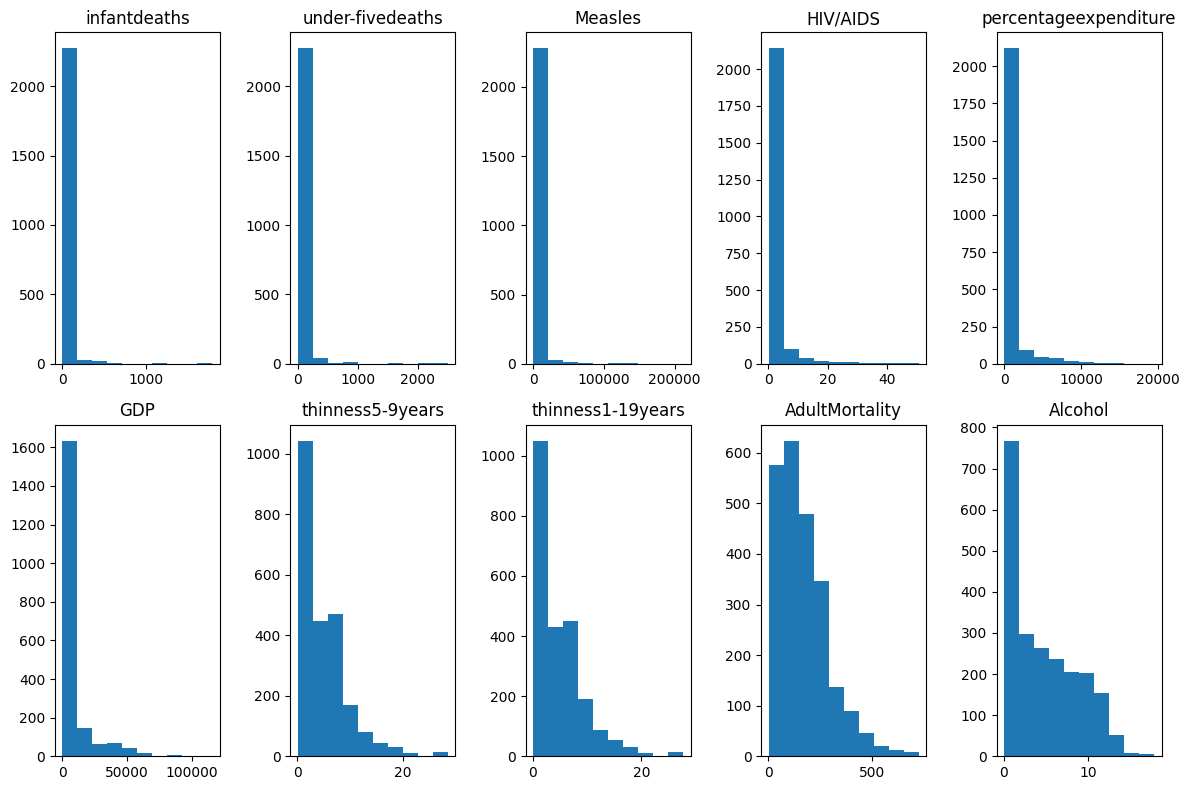

In [48]:
# Plottign the right-skewed data
right_sk_cols = ["infantdeaths", "under-fivedeaths", "Measles", "HIV/AIDS", "percentageexpenditure", "GDP", "thinness5-9years",
                "thinness1-19years", "AdultMortality", "Alcohol"]
fig, ax = plt.subplots(2,5, figsize=(12,8))
for i in range(2):
    if i == 0:
        right_sk_col = right_sk_cols[:5]
    else:
        right_sk_col = right_sk_cols[5:]
    for j, col in zip(range(5), right_sk_col):
        ax[i,j].hist(demographic[col])
        ax[i,j].set_title(col)
plt.tight_layout()
plt.show()

In [49]:
demographic_num.skew().sort_values()

Polio                           -2.116511
Diphtheria                      -2.106197
HepatitisB                      -1.988677
Incomecompositionofresources    -1.153221
Schooling                       -0.590481
BMI                             -0.255130
Year                             0.007094
Totalexpenditure                 0.512218
Alcohol                          0.584732
AdultMortality                   1.157941
thinness1-19years                1.746740
thinness5-9years                 1.818839
GDP                              3.038762
percentageexpenditure            4.376628
HIV/AIDS                         5.374487
Measles                          9.565939
under-fivedeaths                 9.758248
infantdeaths                    10.022582
dtype: float64

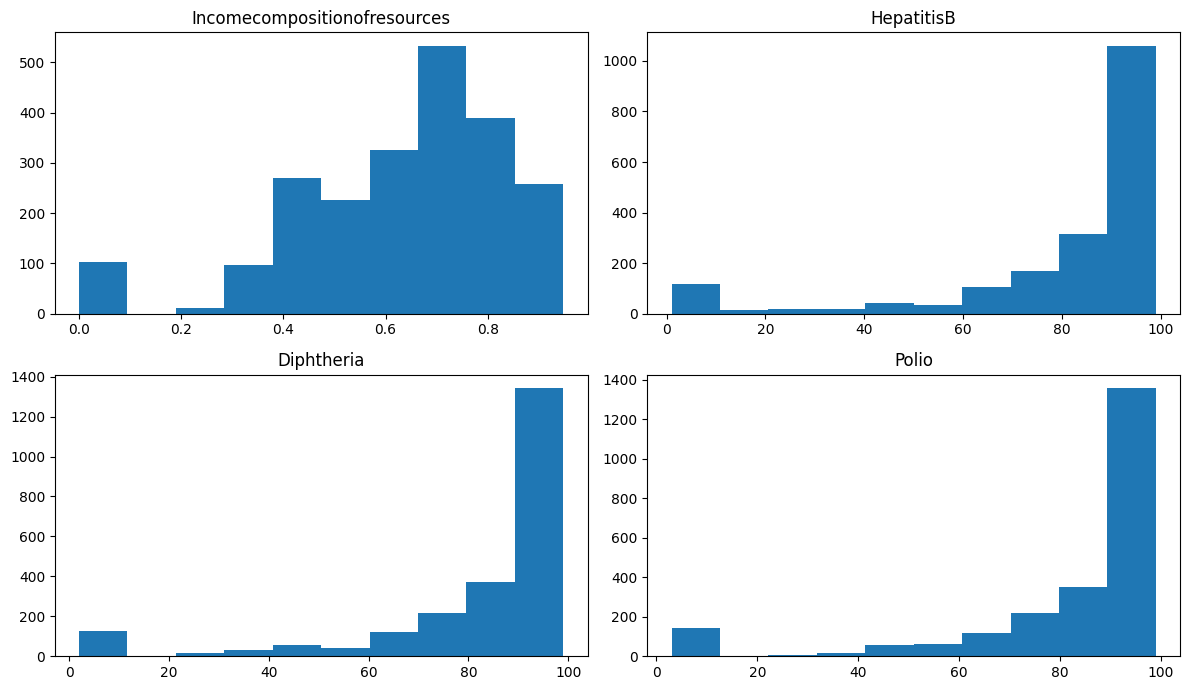

In [50]:
# Plotting the Left-skewed data
left_sk_cols = ["Incomecompositionofresources", "HepatitisB", "Diphtheria", "Polio"]
fig, ax = plt.subplots(2,2, figsize=(12,7))
for i in range(2):
    if i == 0:
        left_sk_col = left_sk_cols[:2]
    else:
        left_sk_col = left_sk_cols[2:]
    for j, col in zip(range(2), left_sk_col):
        ax[i,j].hist(demographic[col])
        ax[i,j].set_title(col)
plt.tight_layout()
plt.show()

In [51]:
# Performed transformations in different columns using different transformers. Conclusion:- 
# We'll use Yeo-Johnson Transformation for right-skewed data plus income composition and Qunatile Transformation for 
# the rest of left-skewed data
# yeo-johh -> all right skew + income
# quantile -> hepatitisB, diptheria, polio 
yeo_johnson_cols = ["infantdeaths", "under-fivedeaths", "Measles", "HIV/AIDS", "percentageexpenditure", "GDP", "thinness5-9years",
                "thinness1-19years", "AdultMortality", "Alcohol", "Incomecompositionofresources"]
quant_cols = ["HepatitisB", "Diphtheria", "Polio"]
remaining = ["Year", "BMI", "Totalexpenditure", "Schooling"]

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

cols = "thinness1-19years", "thinness5-9years", "under-fivedeaths", "infantdeaths"

# Get the index of the above columns
thin119_idx, thin59_idx, under5_idx, infant_idx = [yeo_johnson_cols.index(c) for c in cols]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    This is the transformer to add twoo new columns to the dataframe.
    """
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        thinness = X[:, thin119_idx] + X[:, thin59_idx]
        child_deaths = X[:, under5_idx] + X[:, infant_idx]
        return np.c_[X, thinness, child_deaths]

In [54]:
class DynamicQuantileTransformer(BaseEstimator, TransformerMixin):
    """
    This transformer allows the number of quantiles to be less tham 1000 while transforming the data.
    """
    def __init__(self, output_distribution='normal'):
        self.output_distribution = output_distribution
        self.transformer = None

    def fit(self, X, y=None):
        n_quantiles = min(1000, X.shape[0])
        self.transformer = QuantileTransformer(output_distribution=self.output_distribution, n_quantiles=n_quantiles)
        self.transformer.fit(X)
        return self

    def transform(self, X):
        return self.transformer.transform(X)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # for filling missing values
from sklearn.preprocessing import StandardScaler # for z-score standardization
from sklearn.preprocessing import QuantileTransformer # for quantile transformation
from sklearn.preprocessing import PowerTransformer # for yeo-johnson transformation

# Create a pipeline for numeric columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Transformation pipelines
yeo_john_transform = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_addr', CombinedAttributesAdder()),
    ('transform', PowerTransformer()),
    ('std_scaler', StandardScaler())
])

quant_transform = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('transform', DynamicQuantileTransformer(output_distribution='normal')),
    ('std_scaler', StandardScaler())
])

In [57]:
# Get the list of categorical attributes. It'll be used for binary encoding and one-hot encoding
cat_attribs = list(demographic_cat)
cat_attribs

['Country', 'Status']

In [58]:
# Create a pipeline for both numeric and non-numeric columns
from sklearn.compose import ColumnTransformer

# Let's binary encode the Country column and onehot encode the Status column
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ('binary_encode', BinaryEncoder(), [cat_attribs[0]]),
    ('one_hot_eoncode', OneHotEncoder(), [cat_attribs[1]]),
    ('yeo_transform', yeo_john_transform, yeo_johnson_cols),
    ('quant_transform', quant_transform, quant_cols),
    ('num', num_pipeline, remaining)
])

In [59]:
demographic_prepared = full_pipeline.fit_transform(demographic)

In [60]:
pd.DataFrame(demographic_prepared)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-1.153131,1.038794,0.139316,0.543930,0.051393,0.005838,0.111866,-0.786874,0.025595,-1.056269
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.251174,-0.076378,1.276673,0.380124,0.161019,0.109857,-0.755652,0.729812,-0.285861,-0.257789
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,-1.261188,0.584042,-0.244104,-0.170834,-0.711244,-0.697691,-0.538772,-1.774484,0.555911,-2.468965
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.678725,-0.811270,0.488369,-0.582801,-0.513080,-0.520631,1.196263,1.137957,-0.399500,0.663533
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.394398,-0.413252,-0.550631,0.269739,0.051393,0.005838,-0.972531,1.017025,0.648506,0.264294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.289537,-2.062043,-1.286337,-1.330738,-0.579754,-0.520631,-0.755652,1.248811,-1.788424,-0.472765
2338,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.086636,-1.544584,0.083330,-0.170834,-0.296486,-0.316940,-1.189411,1.027103,0.707430,0.110740
2339,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,-0.549200,-0.330454,0.312851,-0.360294,-0.252328,-0.276597,-0.972531,0.140270,1.010468,-0.534186
2340,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.586368,-0.479044,-0.550631,0.090836,-0.130491,-0.160322,0.762504,0.971676,1.612335,0.448558


## Select and Train a Model

### Training and Evaluating on the Training Set

In [61]:
# Training a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(demographic_prepared, demographic_labels)

LinearRegression()

In [62]:
# Let's measure the RMSE of the model on the whole training set
from sklearn.metrics import mean_squared_error
life_expectancy_predictions = lin_reg.predict(demographic_prepared)

mse = mean_squared_error(demographic_labels, life_expectancy_predictions)
rmse = np.sqrt(mse)
print(rmse)

# It is a good model..rmse is quite low

3.7953085546248917


In [63]:
# Let's train another model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(demographic_prepared, demographic_labels)

DecisionTreeRegressor()

In [65]:
tree_predicts = tree_reg.predict(demographic_prepared)
tree_mse = mean_squared_error(demographic_labels, tree_predicts)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

# Overfitting -- Need to do the cross validation

0.0


### Cross Validation

#### For DecisionTreeRegressor

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    tree_reg,
    demographic_prepared,
    demographic_labels,
    scoring = "neg_mean_squared_error",
    cv = 10
)
tree_rmse_scores = np.sqrt(-scores)

In [67]:
def display_scores(scores):
    print(f"RMSE Scores: {scores}\nMean: {scores.mean()}\nStandard Deviation: {scores.std()}")

In [68]:
display_scores(tree_rmse_scores)

RMSE Scores: [2.79724789 2.63701153 2.56832281 2.59558303 2.63661756 2.5047391
 2.67799676 2.7137195  2.85302359 2.52380123]
Mean: 2.6508062987045835
Standard Deviation: 0.10711910588488961


#### For LinearRegressor

In [69]:
lin_scores = cross_val_score(
    lin_reg,
    demographic_prepared,
    demographic_labels,
    scoring = "neg_mean_squared_error",
    cv = 10
)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

RMSE Scores: [3.88739333 3.56642626 3.31477043 3.90903503 3.92608838 3.90989985
 3.76919885 4.10151874 4.039204   4.03291577]
Mean: 3.845645062987323
Standard Deviation: 0.22803569257742543


#### For RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg_scores = cross_val_score(
    forest_reg,
    demographic_prepared,
    demographic_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

forest_reg_rmse = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_rmse)

RMSE Scores: [2.09697555 1.82802983 1.75865252 1.63941062 1.96789115 1.81736036
 1.7524511  1.70573657 1.75399674 2.03452882]
Mean: 1.8355033270727925
Standard Deviation: 0.14164364733207185


Conclusion: RandomForestRegressor > DecisionTreeRegressor > linearRegressor

## Fine-Tuning the Model

In [71]:
from sklearn.model_selection import GridSearchCV

# list of parameters
param_grid = [
    {'n_estimators': [1, 10, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [5, 20], 'max_features': [6, 7, 8]}
]

grid_search = GridSearchCV(
    forest_reg, 
    param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(demographic_prepared, demographic_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [1, 10, 100]},
                         {'bootstrap': [False], 'max_features': [6, 7, 8],
                          'n_estimators': [5, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=20)

### Feature Importances

In [74]:
bin_encoder = full_pipeline.named_transformers_["binary_encode"]
one_encoder = full_pipeline.named_transformers_["one_hot_eoncode"]

In [75]:
# See the transformed columns by binary encoding
bin_encoder.get_feature_names_out([cat_attribs[0]])

array(['Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4',
       'Country_5', 'Country_6', 'Country_7'], dtype=object)

In [76]:
feature_imps = grid_search.best_estimator_.feature_importances_
cat_attrs = list(bin_encoder.get_feature_names_out([cat_attribs[0]])) + list(one_encoder.categories_[0])
attribs = cat_attrs + yeo_johnson_cols + ["thinness", "child_deaths"] + quant_cols + remaining

# Print the features according to their importances
sorted(zip(feature_imps, attribs), reverse=True)

[(0.23271816919299917, 'HIV/AIDS'),
 (0.21761753673156103, 'AdultMortality'),
 (0.19280821837209952, 'Incomecompositionofresources'),
 (0.10096284766448306, 'Schooling'),
 (0.04903851204214668, 'under-fivedeaths'),
 (0.03780946767010815, 'child_deaths'),
 (0.031384065666591875, 'BMI'),
 (0.016308835426899752, 'thinness'),
 (0.014955194874456802, 'infantdeaths'),
 (0.01341608169086269, 'thinness5-9years'),
 (0.013374436199758151, 'thinness1-19years'),
 (0.010816823963934685, 'Developed'),
 (0.010542972573841037, 'GDP'),
 (0.009162521639495859, 'Polio'),
 (0.008690855334299726, 'Diphtheria'),
 (0.007300861765743175, 'Alcohol'),
 (0.005720829898561208, 'Year'),
 (0.005452529559295164, 'Totalexpenditure'),
 (0.00416094243842338, 'Measles'),
 (0.0037328220904772015, 'percentageexpenditure'),
 (0.0025873687976734664, 'HepatitisB'),
 (0.0019539913899380102, 'Developing'),
 (0.0016991761843310658, 'Country_1'),
 (0.0013727069018818617, 'Country_2'),
 (0.001282255338872138, 'Country_6'),
 (0.00

## Final Model Evaluation

In [77]:
# Test the model on the test set 

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('Lifeexpectancy', axis=1) # training data without labels
y_test = strat_test_set['Lifeexpectancy'].copy()       # labels

X_test_prepared = full_pipeline.fit_transform(X_test)  # prepare the data
final_predicts = final_model.predict(X_test_prepared)  # predict the life expectancy

# Observe the performance
final_mse = mean_squared_error(y_test, final_predicts)
final_rmse = np.sqrt(final_mse)
print(final_rmse) 

2.069478745519508
